In [ ]:
# --- Imports ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from google.colab import files
uploaded = files.upload()

import io
df = pd.read_csv(io.BytesIO(uploaded[list(uploaded.keys())[0]]))


Saving Kids_ScreenTime_Cleaned.csv to Kids_ScreenTime_Cleaned.csv


In [ ]:
# Basic info
print(df.shape)
df.info()
df.head()


(9668, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9668 entries, 0 to 9667
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                9668 non-null   int64  
 1   Gender                             9668 non-null   object 
 2   Avg_Daily_Screen_Time_hr           9668 non-null   float64
 3   Primary_Device                     9668 non-null   object 
 4   Exceeded_Recommended_Limit         9668 non-null   bool   
 5   Educational_to_Recreational_Ratio  9668 non-null   float64
 6   Health_Impacts                     9668 non-null   object 
 7   Urban_or_Rural                     9668 non-null   object 
 8   Age_Group                          9668 non-null   object 
 9   Health_Category                    3520 non-null   object 
 10  Device_Type                        9668 non-null   object 
 11  Screen_Time_Category               9668 non-n

,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural,Age_Group,Health_Category,Device_Type,Screen_Time_Category
0,14,Male,3.99,Smartphone,True,0.42,"Poor Sleep, Eye Strain",Urban,Pre-Teen (11-14),Physical,Portable,Moderate
1,11,Female,4.61,Laptop,True,0.30,Poor Sleep,Urban,Pre-Teen (11-14),NaN,Portable,High
2,18,Female,3.73,TV,True,0.32,Poor Sleep,Urban,Teenager (15-18),NaN,Large Screen,Moderate
3,15,Female,1.21,Laptop,False,0.39,No Reported Issues,Urban,Teenager (15-18),NaN,Portable,Low
4,12,Female,5.89,Smartphone,True,0.49,"Poor Sleep, Anxiety",Urban,Pre-Teen (11-14),Mental,Portable,High


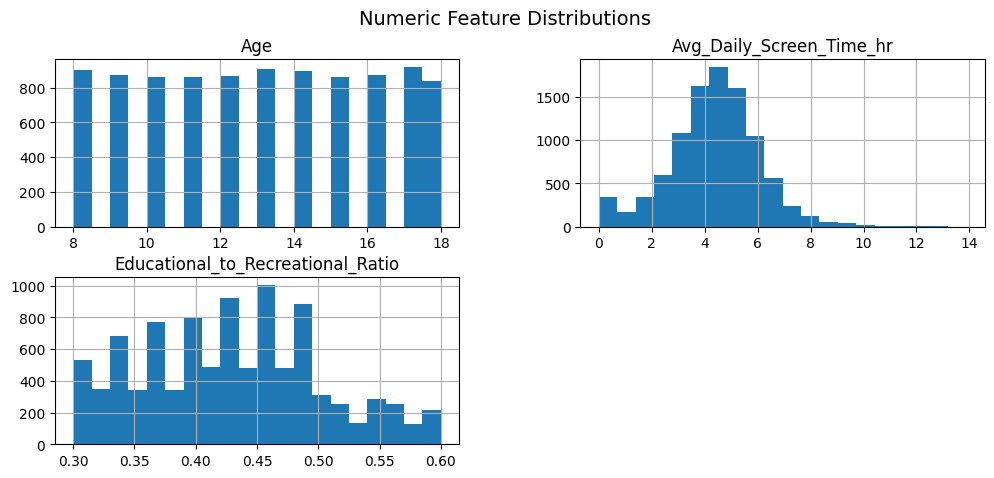

In [ ]:
num_cols = ['Age', 'Avg_Daily_Screen_Time_hr', 'Educational_to_Recreational_Ratio']
df[num_cols].hist(bins=20, figsize=(12, 5))
plt.suptitle("Numeric Feature Distributions", fontsize=14)
plt.show()


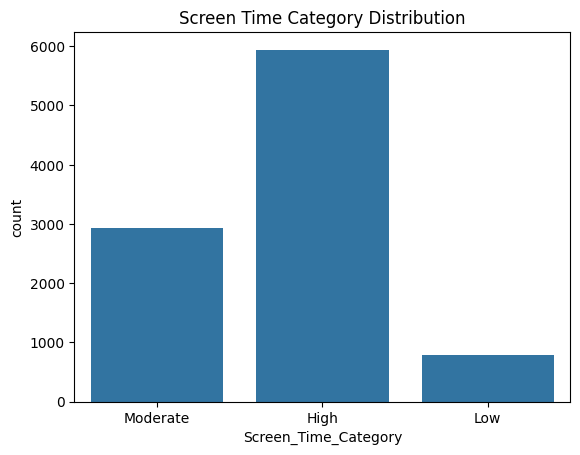

In [ ]:
sns.countplot(x='Screen_Time_Category', data=df)
plt.title('Screen Time Category Distribution')
plt.show()


In [21]:
df.columns

Index(['Age', 'Gender', 'Avg_Daily_Screen_Time_hr', 'Primary_Device',
       'Exceeded_Recommended_Limit', 'Educational_to_Recreational_Ratio',
       'Health_Impacts', 'Urban_or_Rural', 'Age_Group', 'Health_Category',
       'Device_Type', 'Screen_Time_Category'],
      dtype='object')

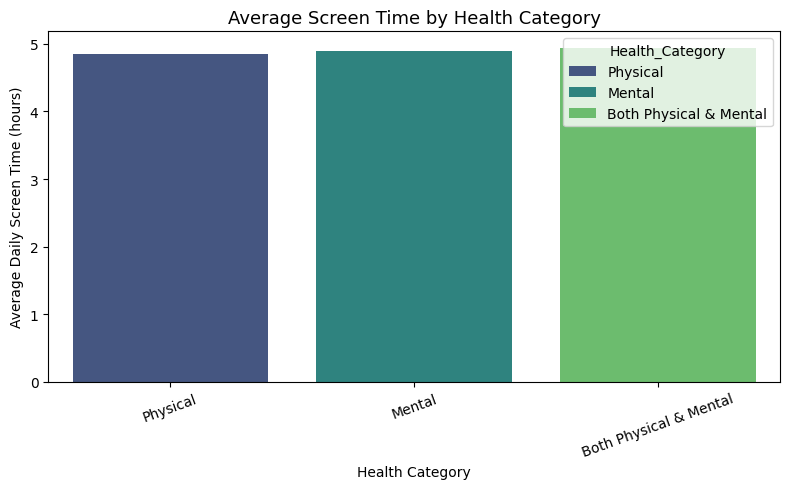

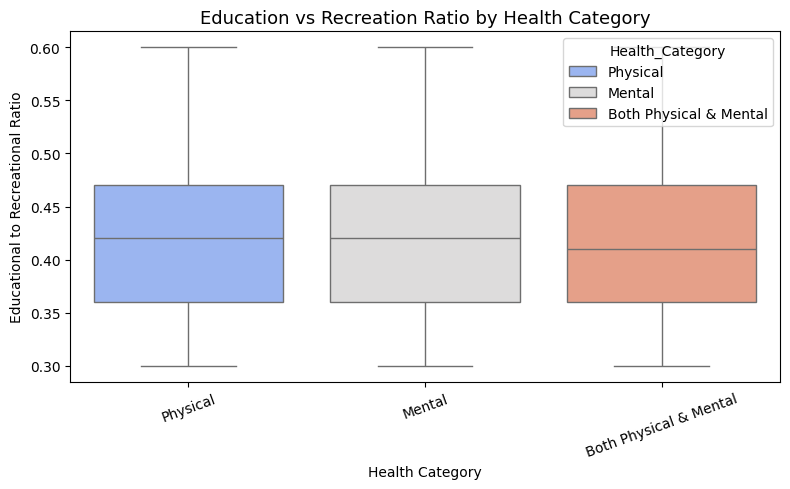

In [22]:
# Plot 1: Average Screen Time by Health Category
plt.figure(figsize=(8,5))
sns.barplot(
    x="Health_Category",
    y="Avg_Daily_Screen_Time_hr",
    hue="Health_Category",
    data=df,
    errorbar=None,
    palette="viridis"
)
plt.title("Average Screen Time by Health Category", fontsize=13)
plt.xlabel("Health Category")
plt.ylabel("Average Daily Screen Time (hours)")
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

# Plot 2: Education vs Recreation Ratio by Health Category
plt.figure(figsize=(8,5))
sns.boxplot(
    x="Health_Category",
    y="Educational_to_Recreational_Ratio",
    hue="Health_Category",
    data=df,
    palette="coolwarm"
)
plt.title("Education vs Recreation Ratio by Health Category", fontsize=13)
plt.xlabel("Health Category")
plt.ylabel("Educational to Recreational Ratio")
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

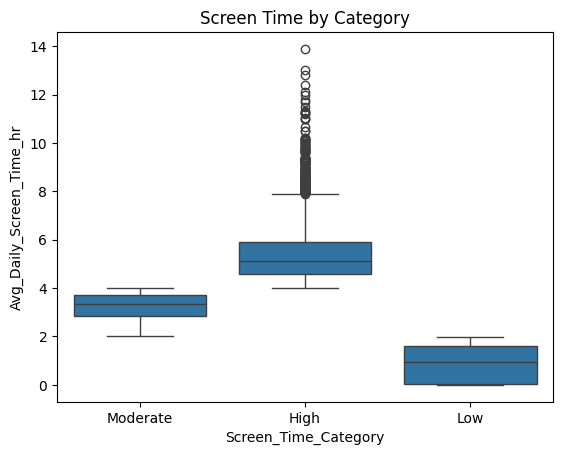

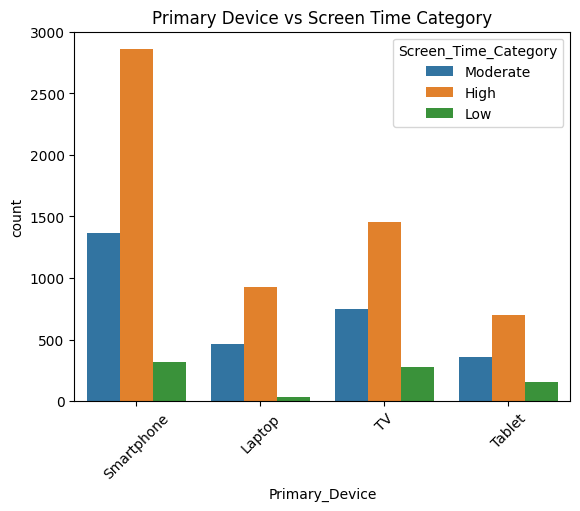

In [ ]:
sns.boxplot(x='Screen_Time_Category', y='Avg_Daily_Screen_Time_hr', data=df)
plt.title('Screen Time by Category')
plt.show()

sns.countplot(x='Primary_Device', hue='Screen_Time_Category', data=df)
plt.title('Primary Device vs Screen Time Category')
plt.xticks(rotation=45)
plt.show()


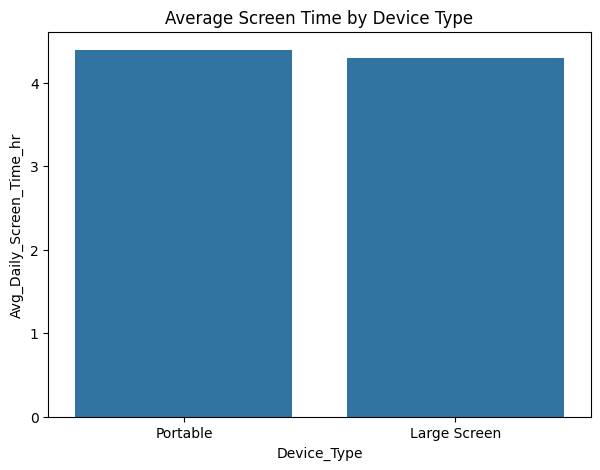

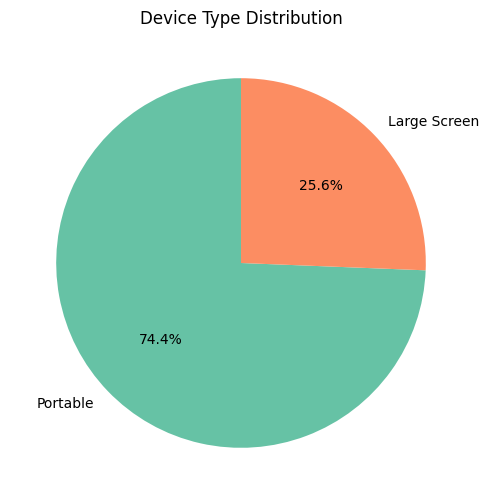

In [18]:

plt.figure(figsize=(7,5))
sns.barplot(x="Device_Type", y="Avg_Daily_Screen_Time_hr", data=df, errorbar=None)
plt.title("Average Screen Time by Device Type")
plt.show()

# Pie chart for distribution
device_counts = df["Device_Type"].value_counts()
plt.figure(figsize=(6,6))
plt.pie(device_counts, labels=device_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set2"))
plt.title("Device Type Distribution")
plt.show()



Portable device users spend more time than fixed device users.
Portability leads to more frequent usage, making it a major factor in high screen exposure.

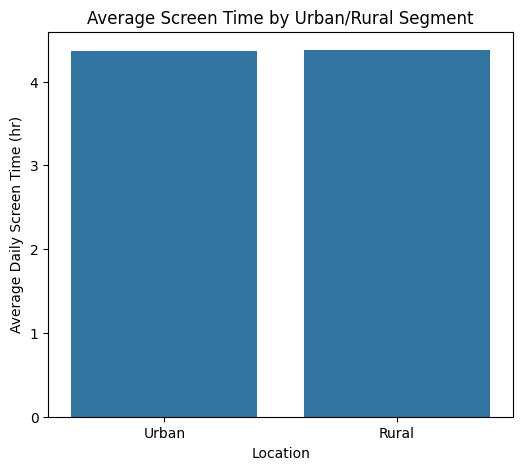

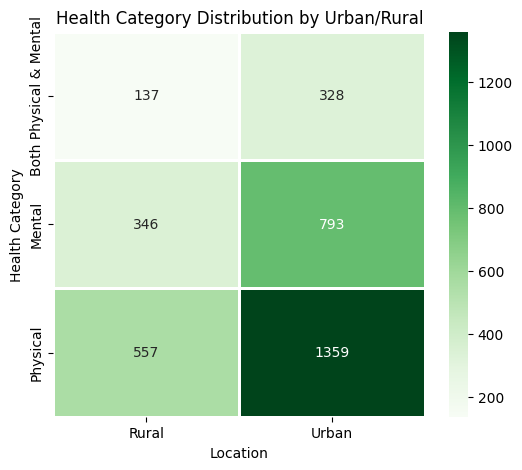

In [23]:
plt.figure(figsize=(6,5))
sns.barplot(x="Urban_or_Rural", y="Avg_Daily_Screen_Time_hr", data=df, errorbar=None)
plt.title("Average Screen Time by Urban/Rural Segment")
plt.ylabel("Average Daily Screen Time (hr)")
plt.xlabel("Location")
plt.show()

# Heatmap: Health Status distribution by Urban/Rural
ct = pd.crosstab(df["Health_Category"], df["Urban_or_Rural"])
plt.figure(figsize=(6,5))
sns.heatmap(ct, annot=True, fmt="d", cmap="Greens", linewidths=1, linecolor="white")
plt.title("Health Category Distribution by Urban/Rural")
plt.ylabel("Health Category")
plt.xlabel("Location")
plt.show()

Top User Segments

Teenagers using TVs/tablets and late teens using laptops/smartphones are the heaviest users.

“Teenagers – TV” average: 4.6 hrs/day; “Late teens – Laptop” average: 4.5 hrs/day.

Teen screen time rises sharply with age; younger kids stay closer to safe limits.

Urban vs Rural Segment Gaps

Urban children show 2–3× higher portable device access than rural peers.

Urban environments show stronger device diversity and higher overexposure.

Health Impact Themes

Both genders report mental or combined (physical + mental) impacts most often.

Males slightly higher in “combined” impact reports.

Overuse symptoms include eye strain, poor sleep, and fatigue.

Awareness Patterns

Teens and pre-teens dominate “Need Attention” and “Moderate Concern” groups.

These groups most frequently exceed recommended screen limits.

Early awareness programs can reduce future overuse habits.

Outlier Risks

Critical Concern and High Concern users (smartphone/TV) show 12–14 hrs/day usage.

Indicates potential digital addiction and dependence.

Suggests need for parental and school-level intervention.

Segment-Driven Risks

Risks depend on age × device rather than either alone.

“Pre-teens – Laptop” and “Teenagers – Tablet” both ≈ 4.45 hrs/day.

Segment-based targeting is more effective than broad campaigns.

Urban/Rural and Awareness

Urban pre-teens (both genders) far outnumber rural ones.

Policies should balance urban overuse reduction and rural digital education.

Urban areas need more focus on screen hygiene practices.

Habit and Calendar Patterns

Screen time peaks on weekends and holidays (Saturday/Sunday).

Monthly trends steady; academic terms influence device mix slightly.

Weekend-focused awareness drives can curb extreme screen use.

Cohort-Level Insights

Highest-risk cohorts: Urban teens using TVs/tablets, late teens using laptops/smartphones.

Most health impacts: Pre-teens and teens.

Urban–rural gap: More about access than time.

High exposure remains consistent year-round across key risk groups.